## <center><font color=navy>Data Science for Quantitative Finance</font></center>
### <center>Monte Carlo Methods for Finance</center>
### <center> Ali Habibnia</center>

    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
 <center> habibnia@vt.edu </center> 

### An Overview of Monte Carlo Methods

- Monte Carlo method is a technique that uses random numbers and probability to solve complex problems. The Monte Carlo simulation, or probability simulation, is a parametric simulation technique used to understand the impact of risk and uncertainty in financial sectors, project management, costs, and other forecasting machine learning models.

- Risk analysis is part of almost every decision we make, as we constantly face uncertainty, ambiguity, and variability in our lives. Moreover, even though we have unprecedented access to information, we cannot accurately predict the future.

- The Monte Carlo simulation allows us to see all the possible outcomes of our decisions and assess risk impact, in consequence allowing better decision making under uncertainty.

- The concept was invented by Stanislaw Ulam, a mathematician who devised these methods as part of his contribution to the Manhattan Project. He used the tools of random sampling and inferential statistics to model likelihoods of outcomes, originally applied to a card game (Monte Carlo Solitaire). Ulam later worked with collaborator John von Neumann, using newly developed computer technologies to run simulations to better understand the risks associated with the nuclear project.

#### Coin Flip Example:

The probability of head for a fair coin is 1/2. However, is there any way we can prove it experimentally? In this example, we are going to use the Monte-Carlo method to simulate the coin-flipping iteratively 5000 times to find out why the probability of a head or tail is always 1/2. If we repeat this coin flipping many, many more times, then we can achieve higher accuracy on an exact answer for our probability value.

While flipping a coin:

P(Head) = P(Tail) = 1/2

Final value : 0.52
Process time : 0.515625


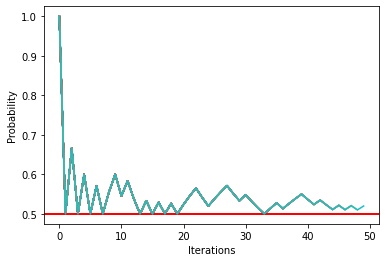

In [4]:
#Import required libraries :

import random
import numpy as np
import matplotlib.pyplot as plt
import time

#Coin flip function :

#0 --> Heads
#1 --> Tails

def coin_flip():
    return random.randint(0,1) 
    
#Check the return value of coin_flip() :

coin_flip()

#Monte Carlo Simulation :

#Empty list to store the probability values.
list1 = []

def monte_carlo(n):
    results = 0
    for i in range(n):
        flip_result = coin_flip()
        results = results + flip_result
        
        #Calculating probability value :
        prob_value = results/(i+1)
        
        #Append the probability values to the list :
        list1.append(prob_value)

        #Plot the results :
        plt.axhline(y=0.5, color='r', linestyle='-')
        plt.xlabel("Iterations")
        plt.ylabel("Probability")
        plt.plot(list1)
       
    return results/n
    
    #Calling the function :

tic = time.process_time()
answer = monte_carlo(50)
print("Final value :",answer)
toc = time.process_time()
print("Process time :",toc - tic)

As shown in above figure, we show that after 500 iterations, the probability of getting a tail is 0.502. Consequently, this is how we can use the Monte Carlo Simulation to find probabilities experimentally.

#### Estimating PI using circle and square:

To estimate the value of PI, we need the area of the square and the area of the circle. To find these areas, we will randomly place dots on the surface and count the dots that fall inside the circle and dots that fall inside the square. Such will give us an estimated amount of their areas. Therefore instead of using the actual areas, we will use the count of dots to use as areas.

Area of square = $(2r)^2$

Area of circle = $\pi r^2$

![](images/MC1.gif)

3.136
3.132
3.136
3.132
3.1432


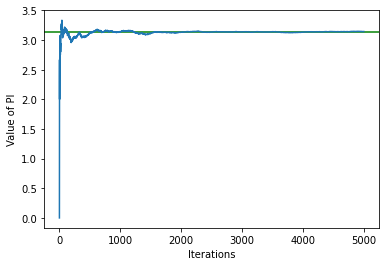

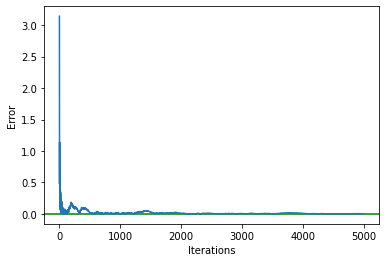

In [1]:
#Import required libraries :
import turtle
import random
import matplotlib.pyplot as plt
import math 

#To visualize the random points :
myPen = turtle.Turtle()
myPen.hideturtle()
myPen.speed(0)

#Drawing a square :
myPen.up()
myPen.setposition(-100,-100)
myPen.down()
myPen.fd(200)
myPen.left(90)
myPen.fd(200)

myPen.left(90)
myPen.fd(200)
myPen.left(90)
myPen.fd(200)
myPen.left(90)

#Drawing a circle :
myPen.up()
myPen.setposition(0,-100)
myPen.down()
myPen.circle(100)

#To count the points inside and outside the circle :
in_circle = 0
out_circle = 0

#To store the values of PI :
pi_values = []

#Running for 5 times :
for i in range(5):
    for j in range(1000):

        #Generate random numbers :
        x=random.randrange(-100,100)
        y=random.randrange(-100,100)

        #Check if the number lies outside the circle :
        if (x**2+y**2>100**2):
            myPen.color("black")
            myPen.up()
            myPen.goto(x,y)
            myPen.down()
            myPen.dot()
            out_circle = out_circle+1

        else:
            myPen.color("red")
            myPen.up()
            myPen.goto(x,y)
            myPen.down()
            myPen.dot()
            in_circle = in_circle+1

        #Calculating the value of PI :
        pi = 4.0 * in_circle / (in_circle + out_circle)

        #Append the values of PI in list :
        pi_values.append(pi)
        
        #Calculating the errors :
        avg_pi_errors = [abs(math.pi - pi) for pi in pi_values]
    
    #Print the final value of PI for each iterations :
    print (pi_values[-1])

#Plot the PI values :
plt.axhline(y=math.pi, color='g', linestyle='-')
plt.plot(pi_values)
plt.xlabel("Iterations")
plt.ylabel("Value of PI")
plt.show()

#Plot the error in calculation :
plt.axhline(y=0.0, color='g', linestyle='-')
plt.plot(avg_pi_errors)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

As shown in figure, we can see that after 5000 iterations, we can get the approximate value of PI. Also, notice that the error in estimation also decreased exponentially as the number of iterations increased.

#### Why Does the House Always Win?

How do casinos earn money? The trick is straightforward — **“The more you play, the more they earn.”** 

Let us take a look at how this works with a simple Monte Carlo Simulation example.

Consider an imaginary game in which a player has to choose a chip from a bag of chips.

**Rules:**

1. There are chips containing numbers ranging from 1–100 in a bag.

2. Users can bet on even or odd chips.

3. In this game, 10 and 11 are special numbers. If we bet on evens, then 10 will be counted as an odd number, and if we bet on odds, then 11 will be counted as an even number.

4. If we bet on even numbers and we get 10 then we lose.

5. If we bet on odd numbers and we get 11 then we lose.

If we bet on odds, the probability that we will win is of 49/100. The probability that the house wins is of 51/100. Therefore, for an odd bet the house edge is = 51/100–49/100 = 200/10000 = 0.02 = 2%

If we bet on evens, the probability that the user wins is of 49/100. The probability that the house wins is of 51/100. Hence, for an odd bet the house edge is = 51/100–49/100 = 200/10000 = 0.02 = 2%

In summary, for every $ 1 bet, $ 0.02 goes to the house. In comparison, the lowest house edge on roulette with a single 0 is 2.5%. Consequently, we are certain that you will have a better chance of winning at our imaginary game than with roulette.


Do you want to bet on Even number or odd number 
Even
[9400, 10800, 9600, 9200, 9800, 9400, 9200, 10400, 9800, 10600]
98200
The player started with $10,000
The player left with $ 9820.0
The player started with $10,000
The player left with $ 9913.8
Number of bets = 5
The player started with $10,000
The player left with $ 9880.0
Number of bets = 10
The player started with $10,000
The player left with $ 10020.0
Number of bets = 100
The player started with $10,000
The player left with $ 10080.0
Number of bets = 1000
The player started with $10,000
The player left with $ 6100.0
Number of bets = 5000
The player started with $10,000
The player left with $ 160.0
Number of bets = 10000
The player started with $10,000
The player left with $ -1980.0


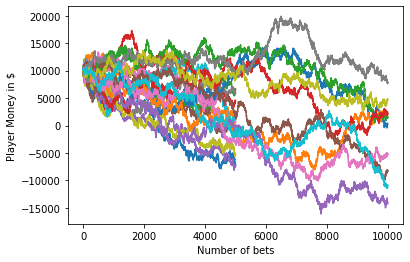

In [5]:
#Import required libraries :

import random
import matplotlib.pyplot as plt

"""RULES : 
1) There are chits containing numbers ranging from 1-100 in a bag.
2) Users can bet on even or odd.
3) In this game 10 and 11 are special numbers. 10 will be counted as an odd number and 11 will be counted as an even number.
4) If you bet on even number and if you get 10 then you lose.
5) If you bet on odd number and if you get 11 then you lose.
"""

#Place your bet:

#User can choose even or odd number :
choice = input("Do you want to bet on Even number or odd number \n")

#For even :
if choice=="Even":
    def pickNote():
        #Get random number between 1-100.
        note = random.randint(1,100)
       
        #Check for our game conditions.
        
        #Notice that 10 isn't considered as even number.
        if note%2!=0 or note==10:
            return False
        elif note%2==0:
            return True

#For odd :        
elif choice=="Odd":
    def pickNote():
        #Get random number between 1-100.
        note = random.randint(1,100)
        
        #Check for our game conditions.
        
        #Notice that 11 isn't considered as odd number.
        if note%2==0 or note==11:
            return False
        elif note%2==1:
            return True  
            
#Main function :
def play(total_money, bet_money, total_plays):

    num_of_plays = []
    money = []
    
    #Start with play number 1
    play = 1
  
    for play in range(total_plays):
        #Win :
        if pickNote():
            #Add the money to our funds
            total_money = total_money + bet_money
            #Append the play number
            num_of_plays.append(play)
            #Append the new fund amount
            money.append(total_money)
        
        #Lose :
        else:
            #Add the money to our funds
            total_money = total_money - bet_money 
            #Append the play number
            num_of_plays.append(play)
            #Append the new fund amount
            money.append(total_money)
    
    #Plot the data :
    plt.ylabel('Player Money in $')
    plt.xlabel('Number of bets')
    plt.plot(num_of_plays,money)

    #Final value after all the iterations :
    final_funds.append(money[-1])
    return(final_funds)
    
    #Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,50)
    
print(ending_fund)
print(sum(ending_fund))

#Print the money the player ends with
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))

#Create a list for calculating final funds
final_funds= []

#Run 1000 iterations :
for i in range(1000):
    ending_fund = play(10000,100,50)

#Print the money the player ends with
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))


#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,5)

#Print the money the player ends with
print("Number of bets = 5")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))


#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,10)

#Print the money the player ends with
print("Number of bets = 10")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))


#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,100)

#Print the money the player ends with
print("Number of bets = 100")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))


#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,1000)

#Print the money the player ends with
print("Number of bets = 1000")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))


#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,5000)

#Print the money the player ends with
print("Number of bets = 5000")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))


#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,10000)

#Print the money the player ends with
print("Number of bets = 10000")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))

### Finance

MC is extensively used in financial engineering for stock market forecasting. This makes intuitive sense, as the market is impossibly difficult to model, has unbelievably high dimensionality, and has plenty of data to be sampled from. 

The importance of risk is another large factor in why financial analysts use MC methods. One relatively straightforward application of Monte Carlo in this field is portfolio optimization. When picking a portfolio of stocks, you may be willing to take on different levels of risk depending on your goals. But regardless of your willingness to accept risk, you can maximize your returns per volatility of the portfolio by using Monte Carlo to find the optimal combinations and proportions of stocks. Using historical data one can generate hundreds of thousands of different combinations of stocks in different ratios, to see how each each would perform relative to each other during that time period. Then one can choose the optimal configuration using a metric called a Sharpe ratio (a measure of the performance of an investment’s returns given its risk.)

#### Securities Pricing

In general, the market price of any security should represent the present value of all future cash flows generated by that security. Consider the following investment vehicle:

Security A

- Pays $100 at the end of year 1

- Pays $100 at the end of year 2

- Pays $100 at the end of year 3

How much should you be willing to pay for Security A? Well, now that we know money is valued differently at different points in time we can use an appropriate risk-free rate to discount the value of each cash flow to the current point in time to determine the price of the security. Assuming the annual risk-free rate of return is 1% we can discount each of the payments to the present.


First Year’s Payment in Today’s Dollars

- 100/(1.01) = 99.01

Second Year’s Payment in Today’s Dollars

- 100/(1.01)² = 98.03

Third Year’s Payment in Today’s Dollars

- 100/(1.01)³ = 97.06

Sum of the Present Value of Future Cash Flows

- $97.06 + $98.03 + $99.01 = $294.10

Therefore, the appropriate value of Security A today is $294.10. We can generalize this concept to find the fair value for any security, regardless of how unique or exotic their payoff structure. However, using this notion of the present value of future cash flows we can find the appropriate price of said securities today (more specifically, the expected present value of future cash flows today). In order to do so, we are going to need a method of modeling stochastic movements in the underlying asset.

#### Geometric Brownian Motion

You may be familiar with Brownian Motion from high school physics. That is the seemingly random motion of air particles as they collide with each other. While we might not be able to characterize the behavior of a single particle, physics and statistics gives us the ability to still describe the likelihoods of where the overall system will end up. See https://en.wikipedia.org/wiki/Brownian_motion

Much in the same way, the Geometric Brownian Motion is a model of an assets returns where the price (or returns) of the asset / shares / investment can be modelled as a random walk (I.e a process where changes in stock prices have the same distribution and are independent of each other. Therefore, it assumes the past movement or trend of a stock price or market cannot be used to predict its future movement (Source : Investopedia)

Geometric Brownian motion is a stochastic process that can be used to generate sample paths that the underlying equity may follow. Rather than dive headlong into some reasonably complex stochastic differential equations , an intuition of how it works is

![](images/GBM.png)


- Yt — Stock price at time t

- dYt — Change in stock price from time t

- μ — Drift term

- σ — Volatility term (the standard deviation of returns)

- dt — Change in time

- W - The Wiener Process random variable where increments in t time have a normal distribution N that is centered at zero. It is often also called Brownian motion due to its historical connection with the physical process of the same name originally observed by Scottish botanist Robert Brown. It is one of the best known Lévy processes (càdlàg stochastic processes with stationary independent increments) and occurs frequently in pure and applied mathematics, economics, quantitative finance, evolutionary biology, and physics. 

https://en.wikipedia.org/wiki/Wiener_process


Essentially, the GBM model allow us to model future prices based a combination of a “drift” that is driven by the average (i.e mean of the log returns) and a “shock” which is random but can be still be characterized by the volatility (i.e the standard deviation of the log returns).

There appear to be many components to geometric Brownian motion, but there are essentially three components: the return (dYt/Yt), the expected return (μdt), and the shocks to the return (σdWt). We can model geometric Brownian motion in Python very easily using the following code.

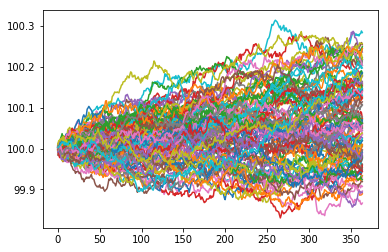

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math


class GeometricBrownianMotion:

    def simulate_paths(self):
        while(self.T - self.dt > 0):
            dWt = np.random.normal(0, math.sqrt(self.dt))  # Brownian motion
            dYt = self.drift*self.dt + self.volatility*dWt  # Change in price
            self.current_price += dYt  # Add the change to the current price
            self.prices.append(self.current_price)  # Append new price to series
            self.T -= self.dt  # Accound for the step in time

    def __init__(self, initial_price, drift, volatility, dt, T):
        self.current_price = initial_price
        self.initial_price = initial_price
        self.drift = drift
        self.volatility = volatility
        self.dt = dt
        self.T = T
        self.prices = []
        self.simulate_paths()

# Model Parameters
paths = 100
initial_price = 100
drift = .08
volatility = .1
dt = 1/365
T = 1
price_paths = []

# Generate a set of sample paths
for i in range(0, paths):
    price_paths.append(GeometricBrownianMotion(initial_price, drift, volatility, dt, T).prices)

# Plot the set of generated sample paths
for price_path in price_paths:
    plt.plot(price_path)
plt.show()

When using geometric Brownian motion to model an equity we only need to provide a few parameters: initial stock price, drift (expected return) of the equity for time period T, volatility of the equity for time period T, the length of the time steps dt, and the total time we are generating to T. In the code above we use the following parameter set…

- Initial Price — 100

- Drift — 8% (expected return)

- Volatility — 10% (expected shock to return)

- Time Steps (dt) — 1/365 (daily)

- Total Time (T) — 1 (one year)

If using geometric Brownian motion to generate sample paths for a real equity, there are a few ways you can go about finding drift and volatility. Generally, I use the average historical return for the time period T I am generating for, and volatility I use the implied volatility for an at the money option. After running the code above we end up generating 100 sample paths that can be plotted using matplotlib.

### Generate correlated data in Python

numpy.random.multivariate_normal is the function for drawing random samples from a multivariate normal distribution.

Let's assume that daily returns are distributed Multivariate Normal with mean vector $μ$ and the covariance matrix $Σ$. In other words,

$R_t ∼ MVN(μ,Σ)$

For simplicity we will only consider three assets.

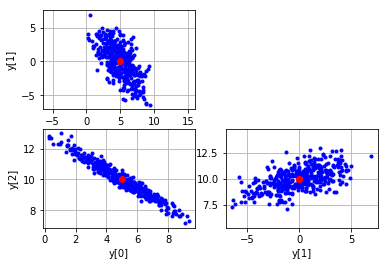

In [7]:
import numpy as np
import matplotlib.pyplot as plt


num_samples = 400

# The desired mean values of the sample.
mu = np.array([5.0, 0.0, 10.0])

# The desired covariance matrix.
cov = np.array([
        [  3.40, -2.75, -2.00],
        [ -2.75,  5.50,  1.50],
        [ -2.00,  1.50,  1.25]
    ])

# Generate the random samples.
y = np.random.multivariate_normal(mu, cov, size=num_samples)


# Plot various projections of the samples.
plt.subplot(2,2,1)
plt.plot(y[:,0], y[:,1], 'b.')
plt.plot(mu[0], mu[1], 'ro')
plt.ylabel('y[1]')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(y[:,0], y[:,2], 'b.')
plt.plot(mu[0], mu[2], 'ro')
plt.xlabel('y[0]')
plt.ylabel('y[2]')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(y[:,1], y[:,2], 'b.')
plt.plot(mu[1], mu[2], 'ro')
plt.xlabel('y[1]')
plt.axis('equal')
plt.grid(True)

plt.show()

### Cholesky Decomposition and its importance in Quantitative Finance

- Cholesky Decomposition plays a very important role in Quantitative Finance, especially in the Derivatives pricing and portfolio cunstruction were we are dealing with multiple correlated assets. 

- When we are trying to Model Products whose price/payoff is dependent on multiple assets, in many cases it’s preferable to use a Monte Carlo Simulation Approach rather than a closed form solution approach( A closed form solution may not be even feasible in many cases). 

- When we deal with Monte Carlo simulation, in the basic form what we require is an array of Random Nos., in most cases it will be from the Standard Normal Distribution. But in case of Multiple Assets we need to generate Correlated Random Nos., and it’s for this purpose we use the Cholesky Decomposition, which acts as a filter which converts uncorrelated Random Nos. to Correlated random Nos.

- Cholesky decomposition or Cholesky factorization is a decomposition of a Hermitian, positive-definite matrix into the product of a lower triangular matrix and its conjugate transpose.

- In particular, it makes an appearance in Monte Carlo Methods where it is used to simulating systems with correlated variables. Cholesky decomposition is applied to the correlation matrix, providing a lower triangular matrix L, which when applied to a vector of uncorrelated samples, u, produces the covariance vector of the system. Thus it is highly relevant for quantitative trading.
 

### Generating Correlated Asset Paths and Monte Carlo Simulation of Stock Portfolio

We conduct our Monte Carlo study in the context of simulating daily returns for an investment portfolio. For simplicity we will only consider three assets: Apple, Google, and Facebook. We will assume an Initial Investment of 100,000 dollars and allocate our money evenly between the three stocks. In this case the portfolio weights $w_i=1/3$ for $i=1,2,3$.

Next, we assume that daily returns are distributed Multivariate Normal with mean vector $μ$ and covariance matrix $Σ$. In other words,

$R_t ∼ MVN(μ,Σ)$

for $t∈{1,…,T}$ where $T$ is the final time horizon.

We will use the Cholesky Factorization in order to find Lower Triangular Matrix $L$ such that $LL′=Σ$. Then our returns can be generated by

$R_t = μ + LZ_t$

where $Z_t ∼ N(0,I)$ for $t∈{1,…,T}$.

The returns will be simulated over a 30-day period, where our 30-day returns can be formulated as,

$\hat R_{30}=∏_{t=1}^{30} (1+R_t)$


Thus our portfolio returns for each Monte Carlo trial $m$ become the inner product between the 30-day returns and our vector of portfolio weights $w$,

$P_m = w⋅\hat R_{30}$

We use adjusted-close stock prices for Apple, Google, and Facebook from Yahoo Finance for this example.

In [14]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
tickers = ['AAPL', 'FB', 'GOOG']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2019-01-01'
end_date = '2020-12-31'

df = data.DataReader(tickers, 'yahoo', start_date, end_date)
df.head()

Attributes  Adj Close                               Close              \
Symbols          AAPL          FB         GOOG       AAPL          FB   
Date                                                                    
2019-01-02  38.505024  135.679993  1045.849976  39.480000  135.679993   
2019-01-03  34.669640  131.740005  1016.059998  35.547501  131.740005   
2019-01-04  36.149662  137.949997  1070.709961  37.064999  137.949997   
2019-01-07  36.069202  138.050003  1068.390015  36.982498  138.050003   
2019-01-08  36.756794  142.529999  1076.280029  37.687500  142.529999   

Attributes                    High                                 Low  \
Symbols            GOOG       AAPL          FB         GOOG       AAPL   
Date                                                                     
2019-01-02  1045.849976  39.712502  137.509995  1052.319946  38.557499   
2019-01-03  1016.059998  36.430000  137.169998  1056.979980  35.500000   
2019-01-04  1070.709961  37.137501  138.000000  1070.839966  35.950001   
2019-01-07  1068.390015  37.207500  138.869995  1074.000000  36.474998   
2019-01-08  1076.280029  37.955002  143.139999  1084.560059  37.130001   

Attributes                                Open                           \
Symbols             FB         GOOG       AAPL          FB         GOOG   
Date                                                                      
2019-01-02  128.559998  1015.710022  38.722500  128.990005  1016.570007   
2019-01-03  131.119995  1014.070007  35.994999  134.690002  1041.000000   
2019-01-04  133.750000  1027.417969  36.132500  134.009995  1032.589966   
2019-01-07  135.910004  1054.760010  37.174999  137.559998  1071.500000   
2019-01-08  139.539993  1060.530029  37.389999  139.889999  1076.109985   

Attributes       Volume                         
Symbols            AAPL          FB       GOOG  
Date                                            
2019-01-02  148158800.0  28146200.0  1532600.0  
2019-01-03  365248800.0  22717900.0  1841100.0  
2019-01-04  234428400.0  29002100.0  2093900.0  
2019-01-07  219111200.0  20089300.0  1981900.0  
2019-01-08  164101200.0  26263800.0  1764900.0

In [13]:
# Set Monte_Carlo parameters

mc_rep = 1000
train_days = 30

In [19]:
# Calculate stock returns

stock_price = df['Close'].values
nrows = len(stock_price)
stock_returns = stock_price[1:nrows,:] / stock_price[0:nrows-1,:] - 1

In [20]:
# Set portfolio weight

portf_WT = np.array([1/3, 1/3, 1/3])


# Calculate covariance matrix and mean of the stock returns

cov = np.cov(np.transpose(stock_returns))
miu = np.mean(stock_returns, axis=0)
Miu = np.full((train_days,3),miu)
Miu = np.transpose(Miu)

In [21]:
# Then we use Monte-Carlo to simulate the portfolio returns in 30 days

# initial matrix
portf_returns_30_m = np.full((train_days,mc_rep),0.)

np.random.seed(100)
for i in range(0,mc_rep):
    Z = np.random.normal(size=3*train_days)
    Z = Z.reshape((3,train_days))
    L = np.linalg.cholesky(cov)
    daily_returns = Miu + np.inner(L,np.transpose(Z))
    portf_Returns_30 = np.cumprod(np.inner(portf_WT,np.transpose(daily_returns)) + 1)
    portf_returns_30_m[:,i] = portf_Returns_30

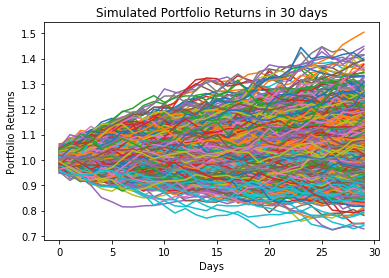

In [22]:
# Visualizing the result

plt.plot(portf_returns_30_m)
plt.ylabel('Portfolio Returns')
plt.xlabel('Days')
plt.title('Simulated Portfolio Returns in 30 days')
plt.show()

In [23]:
# Porfolio Returns statistics on the 30th day
Avg_portf_returns = np.mean(portf_returns_30_m[29,:]-1)
SD_portf_returns = np.std(portf_returns_30_m[29,:]-1)
Median_portf_returns = np.median(portf_returns_30_m[29,:]-1)
print(Avg_portf_returns)
print(SD_portf_returns)
print(Median_portf_returns)

0.060919743200119114
0.11921005106006845
0.05340450829193222


In [24]:
# construct CI for average
Avg_CI = np.quantile(portf_returns_30_m[29,:]-1,np.array([0.025,0.975]))
print(Avg_CI)

[-0.15734482  0.31330856]


For our particular example, the portfolio returns averaged over all monte carlo trials had an average close to 0. The reason the average is close to 0 is because Apple, Facebook, and Google have average returns close to 0 over the past year. Therefore, our simulated returns essentially had no drift. Also, assuming a normal distribution of the returns would not work well in practice since stock returns are typically fat-tailed and not normally distributed. However, based on our Monte Carlo Study, we do not suggest investing in this portfolio based on the low expected portfolio returns.